# Installs and Imports

In [ ]:
# For data analysis
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for data download
from google.colab import userdata
import huggingface_hub
from huggingface_hub import HfApi, hf_hub_download, snapshot_download

# for regression analysis
from datetime import datetime
import statsmodels.api as sm

## Download Data

In [ ]:
# download data from huggingface
hf_hub_download(repo_id="Matthewfung/24Summer_RA",
                repo_type="dataset",
                filename='Results/final_data.csv',
                token = userdata.get('HuggingfaceRead'),
                local_dir='/content')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


final_data.csv:   0%|          | 0.00/163M [00:00<?, ?B/s]

'/content/Results/final_data.csv'

## Data Reading

In [ ]:
df = pd.read_csv('/content/Results/final_data.csv')
data = df.copy()

# OLS

## Data Checking

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743233 entries, 0 to 743232
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CID                  743233 non-null  int64  
 1   MenteeID             743233 non-null  int64  
 2   MentorID             743233 non-null  int64  
 3   MentorshipType       743233 non-null  int64  
 4   Institution          716157 non-null  object 
 5   InstitutionMAGID     743233 non-null  int64  
 6   Institution_H_Index  650974 non-null  float64
 7   StartYear            743233 non-null  int64  
 8   StopYear             743233 non-null  int64  
 9   mentor_1st_pub_time  655358 non-null  object 
 10  mentee_1st_pub_time  489373 non-null  object 
 11  mentor_gender        743082 non-null  object 
 12  mentor_race          378833 non-null  object 
 13  mentee_gender        743035 non-null  object 
 14  mentee_race          408938 non-null  object 
 15  Mentor_WPS       

In [ ]:
data.head()

,CID,MenteeID,MentorID,MentorshipType,Institution,InstitutionMAGID,Institution_H_Index,StartYear,StopYear,mentor_1st_pub_time,...,Mentor_WPS,Mentee_WPS,mentor_WFS,mentee_WFS,mentor_domain,mentee_domain,mentor_num_pub,mentee_num_pub,mentor_citations,mentee_citations
0,2,2,3,1,"University of California, Berkeley",95457486,1169.0,2000,2005,1990-02-01,...,2.066691,2.368732,7.111921,7.111089,Life Sciences,Life Sciences,83.0,90.0,148.771429,62.777778
1,3,4,3,2,"University of California, Berkeley",95457486,1169.0,2003,2006,1990-02-01,...,2.066691,1.402405,7.111921,7.938187,Life Sciences,Life Sciences,83.0,3.0,148.771429,35.666667
2,5,6,3,1,"University of California, Berkeley",95457486,1169.0,2002,2008,1990-02-01,...,2.066691,3.915893,7.111921,8.197137,Life Sciences,Physical Sciences,83.0,16.0,148.771429,229.320000
3,6,18761,9,1,"University of California, Berkeley",95457486,1169.0,-1,1984,1963-07-01,...,4.291308,5.729919,8.702959,9.001187,Life Sciences,Health Sciences,59.0,129.0,64.390000,68.681452
4,7,10,16,2,"Washington University, Saint Louis",204465549,882.0,-1,-1,1973-01-01,...,2.698710,NaN,6.689360,NaN,Life Sciences,NaN,165.0,NaN,307.774775,NaN


In [ ]:
data.describe()

,CID,MenteeID,MentorID,MentorshipType,InstitutionMAGID,Institution_H_Index,StartYear,StopYear,Mentor_WPS,Mentee_WPS,mentor_WFS,mentee_WFS,mentor_num_pub,mentee_num_pub,mentor_citations,mentee_citations
count,7.432330e+05,743233.000000,743233.000000,743233.000000,7.432330e+05,650974.000000,743233.000000,743233.000000,656452.000000,490655.000000,654696.000000,488894.000000,654696.000000,488894.000000,655418.000000,489380.000000
mean,8.466214e+05,397933.887753,316868.168273,1.158908,1.185806e+08,642.665904,362.471128,1648.413255,3.350993,2.448931,8.934121,9.504219,123.047622,37.713905,53.683103,46.560652
std,5.284312e+05,259449.964218,249515.420670,0.590138,2.156118e+08,343.405470,771.730475,764.190888,1.551915,1.817930,2.331465,2.436428,163.714567,80.908943,60.740720,73.224714
min,0.000000e+00,1.000000,1.000000,0.000000,0.000000e+00,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.165984,0.944406,1.000000,1.000000,0.000000,0.000000
25%,4.071850e+05,157072.000000,67659.000000,1.000000,3.321314e+07,382.000000,-1.000000,1988.000000,2.458305,1.046513,7.475153,7.964303,27.000000,3.000000,18.666667,13.294118
50%,8.349370e+05,385834.000000,286957.000000,1.000000,9.545749e+07,634.000000,-1.000000,2005.000000,3.316434,2.428928,8.911765,9.313666,71.000000,11.000000,38.187681,29.910530
75%,1.294723e+06,630166.000000,522825.000000,1.000000,1.495211e+08,880.000000,-1.000000,2010.000000,4.281703,3.614493,10.351664,10.883768,156.000000,36.000000,69.571970,56.857143
max,1.784805e+06,839681.000000,839680.000000,4.000000,3.045169e+09,1596.000000,2023.000000,2030.000000,13.857887,13.857887,28.155804,31.848305,2928.000000,2928.000000,5165.000000,8714.000000


## Data Transformation

In [ ]:
# Remove null values
data = data.dropna().reset_index(drop=True)

In [ ]:
def calculate_years_until_now(date_string):
  if pd.isnull(date_string):
    return 0
  else:
    # Convert the string to a datetime object
    date_obj = datetime.strptime(date_string, '%Y-%m-%d')

    # Get the current date
    current_date = datetime.now()

    # Calculate the difference in years
    years_difference = current_date.year - date_obj.year

    # Adjust if the current date has not yet reached the anniversary in the current year
    if (current_date.month, current_date.day) < (date_obj.month, date_obj.day):
        years_difference -= 1

    return years_difference

In [ ]:
data['mentor_1st_pub_time'] = data['mentor_1st_pub_time'].apply(calculate_years_until_now)
data['mentee_1st_pub_time'] = data['mentee_1st_pub_time'].apply(calculate_years_until_now)

## Regression Analysis

In our previous analysis, the average citation counts of mentees in different groups are:

* Asian Mentor Asian Mentee: 37.924819
* Asian Mentor White Mentee: 50.435045
* White Mentor White Mentee: 49.972066
* White Mentor Asian Mentee: 49.677267

We can see that the average citation count of mentees for group Asian mentors with Asian mentees is significantly lower than the other groups.



### Overall Analysis (on mentee citations)

In [ ]:
y = data['mentee_citations']

X = data[['Institution_H_Index', 'mentor_1st_pub_time', 'mentee_1st_pub_time',
          'mentor_gender', 'mentor_race', 'mentee_gender', 'mentee_race',
          'Mentor_WPS', 'Mentee_WPS', 'mentor_WFS', 'mentee_WFS', 'mentor_domain',
          'mentee_domain', 'mentor_num_pub', 'mentee_num_pub', 'mentor_citations']]

In [ ]:
X_dummies = pd.get_dummies(X, columns=['mentor_gender', 'mentor_race',
                                       'mentee_gender', 'mentee_race',
                                       'mentor_domain', 'mentee_domain'], dtype=float)

In [ ]:
X_dummies = X_dummies.drop(columns=['mentor_gender_man',
                                    'mentee_gender_man',
                                    'mentor_race_White',
                                    'mentee_race_White',
                                    'mentor_domain_Physical Sciences',
                                    'mentee_domain_Physical Sciences'])

In [ ]:
# Add a constant
X_dummies = sm.add_constant(X_dummies)

# Fit the OLS model
model = sm.OLS(y, X_dummies).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       mentee_citations   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     679.2
Date:                Sat, 24 Aug 2024   Prob (F-statistic):               0.00
Time:                        06:14:01   Log-Likelihood:            -7.8369e+05
No. Observations:              137876   AIC:                         1.567e+06
Df Residuals:                  137849   BIC:                         1.568e+06
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

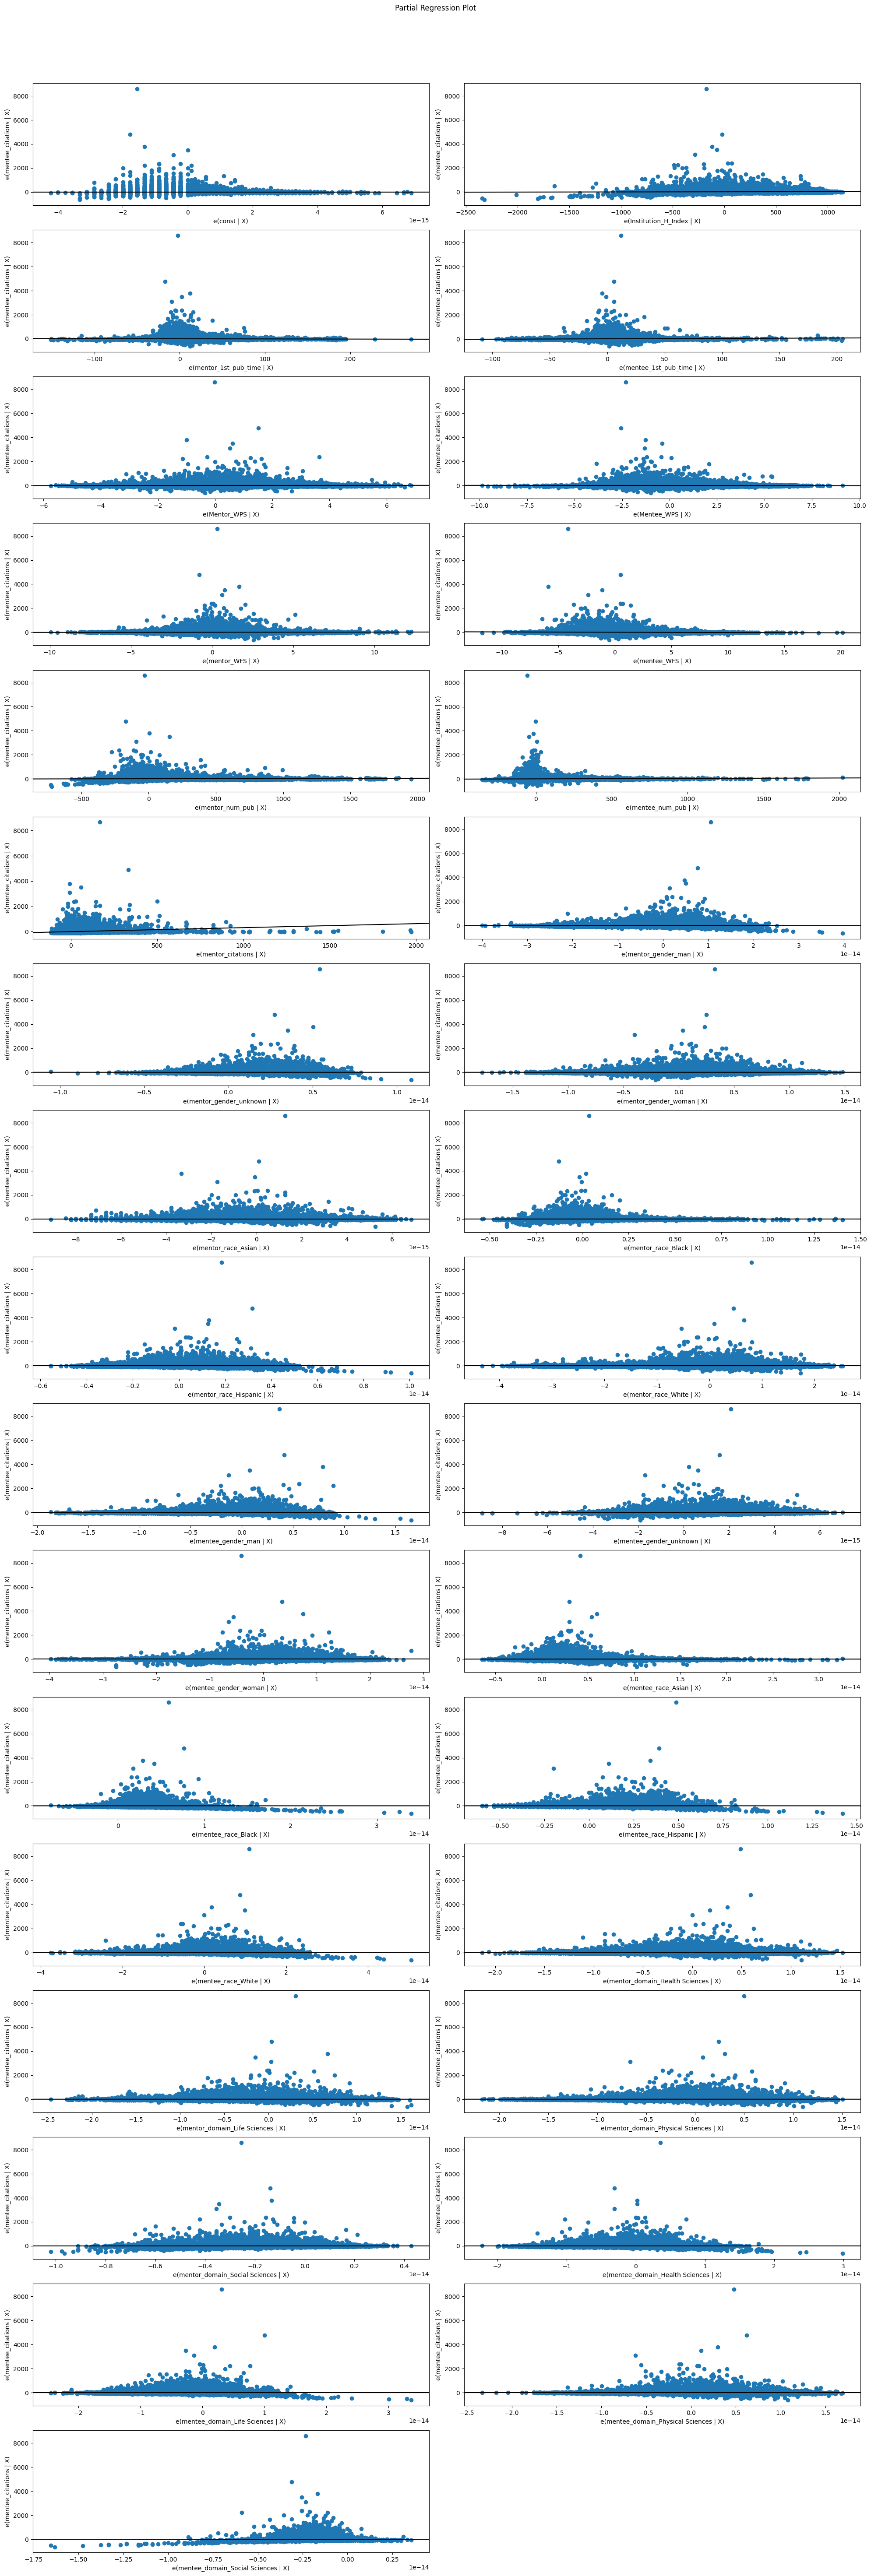

In [ ]:
# # Generate partial regression plots
# fig = plt.figure(figsize=(20, 60))
# sm.graphics.plot_partregress_grid(model, fig=fig)
# plt.show()

### Overall Analysis using mentor & mentee race pairing (on mentee citations)

In [ ]:
y = data['mentee_citations']

X = data[['Institution_H_Index', 'mentor_1st_pub_time', 'mentee_1st_pub_time',
          'mentor_gender', 'mentor_race', 'mentee_gender', 'mentee_race',
          'Mentor_WPS', 'Mentee_WPS', 'mentor_WFS', 'mentee_WFS', 'mentor_domain',
          'mentee_domain', 'mentor_num_pub', 'mentee_num_pub', 'mentor_citations']]

In [ ]:
pairing = []

# Define the mapping of race pairs to values
race_pairs = {
    ('Asian', 'Asian'): 0,
    ('Asian', 'White'): 1,
    ('White', 'Asian'): 2,
    ('White', 'White'): 3
}

for _, row in X.iterrows():
    # Get the race pair
    pair = (row['mentor_race'], row['mentee_race'])
    # Append the corresponding value or 4 if the pair is not in the dictionary
    pairing.append(race_pairs.get(pair, 4))

In [ ]:
X = X.drop(columns=['mentor_race', 'mentee_race'])
X['race_pairing'] = pairing

In [ ]:
X_dummies = pd.get_dummies(X, columns=['mentor_gender', 'mentee_gender', 'race_pairing',
                                       'mentor_domain', 'mentee_domain'], dtype=float)

In [ ]:
X_dummies = X_dummies.drop(columns=['mentor_gender_man',
                                    'mentee_gender_man',
                                    'race_pairing_3',
                                    'mentor_domain_Physical Sciences',
                                    'mentee_domain_Physical Sciences'])

In [ ]:
# Add a constant
X_dummies = sm.add_constant(X_dummies)

# Fit the OLS model
model = sm.OLS(y, X_dummies).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       mentee_citations   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     735.5
Date:                Sat, 24 Aug 2024   Prob (F-statistic):               0.00
Time:                        06:26:03   Log-Likelihood:            -7.8370e+05
No. Observations:              137876   AIC:                         1.567e+06
Df Residuals:                  137851   BIC:                         1.568e+06
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

### Overall Analysis using mentor & mentee race pairing (on mentee WPS)

In [ ]:
y = data['Mentee_WPS']

X = data[['Institution_H_Index',
          'mentor_1st_pub_time', 'mentee_1st_pub_time',
          'mentor_gender', 'mentor_race',
          'mentee_gender', 'mentee_race',
          'Mentor_WPS',
          'mentor_WFS', 'mentee_WFS',
          'mentor_domain', 'mentee_domain',
          'mentor_num_pub', 'mentee_num_pub',
          'mentor_citations', 'mentee_citations']]

In [ ]:
X = X.drop(columns=['mentor_race', 'mentee_race'])
X['race_pairing'] = pairing

In [ ]:
X_dummies = pd.get_dummies(X, columns=['mentor_gender', 'mentee_gender',
                                       'race_pairing',
                                       'mentor_domain', 'mentee_domain'], dtype=float)

In [ ]:
X_dummies = X_dummies.drop(columns=['mentor_gender_man',
                                    'mentee_gender_man',
                                    'race_pairing_3',
                                    'mentor_domain_Physical Sciences',
                                    'mentee_domain_Physical Sciences'])

In [ ]:
# Add a constant
X_dummies = sm.add_constant(X_dummies)

# Fit the OLS model
model = sm.OLS(y, X_dummies).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Mentee_WPS   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     1637.
Date:                Sat, 24 Aug 2024   Prob (F-statistic):               0.00
Time:                        07:44:56   Log-Likelihood:            -2.5712e+05
No. Observations:              137876   AIC:                         5.143e+05
Df Residuals:                  137851   BIC:                         5.145e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         